In [43]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

import hddm

### Separate based on response (flash first or beep first)

In [44]:
resppath = 'StabilityofPCommonData/NumerosityTaskUnformatted/*.mat'
respfiles = np.array(glob.glob(resppath))
datapath = 'StabilityofPCommonData/NumerosityTaskData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [45]:
# filenames for f or b responses
respf = np.empty((1, 1))
respb = np.empty((1, 1))
for names in respfiles:
    mat = sci.loadmat(names)
    resp = mat['respCode']
    if(resp == "f"):
        respf = np.append(respf, names)
    else:
        respb = np.append(respb, names)
respf = respf[1:]
respb = respb[1:]

In [296]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexf = list()
c = 0
for x in respfiles:
    if x in respf:
        indexf.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
dataf = datafiles[indexf]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexf = np.delete(indexf, missing)

### Extract trial data and response times for flash trials

In [293]:
# further subset into flash reported and insert indices for subject id  
dataf = datafiles[indexf]

subjidf = np.array([2,5,7,7,11,11,12,12,15,15,19,20,20,23,28,31,32,32,35,36,37,37,40,
                   40,41,41,42,50,50,53,53,54,54,57,57,60,60,61,61,64])
trialsf = np.empty((1,5))
for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidf[i]), axis=1)
    trialsf = np.vstack((trialsf, arr))
trialsf = trialsf[1:]
print(len(trialsf))

# add a response column to second column, 1 if correct 0 if wrong
respcol = np.empty((1,1))
for rows in trialsf:
    if rows[1] == rows[3]:
        respcol = np.append(respcol, 1)
    else:
        respcol = np.append(respcol, 0)
respcol = respcol[1:]

trialsf = np.insert(trialsf, 1, respcol, axis=1)

14400


In [214]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respf = respfiles[indexf]

for i in np.arange(0, len(respf)):
    mat = sci.loadmat(respf[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]
print(len(resptimes))

trialsf = pd.DataFrame(np.insert(trialsf, 1, resptimes, axis = 1), 
                        columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])
#trialsf = np.insert(trialsf, 1, resptimes, axis = 1)

14400


### Further subset into congruent, incongruent, and unimodal rows

In [278]:
congf = trialsf.loc[trialsf['flashpres'] == trialsf['beeppres']]

incongf = trialsf.loc[(trialsf['flashpres'] != trialsf['beeppres']) & (trialsf['flashpres'] != 0) & (trialsf['beeppres'] != 0)]

unif = trialsf.loc[(trialsf['flashpres'] != 0) & (trialsf['beeppres'] == 0)]

In [294]:
congfsd = congf['rt'].std()
congf = congf.loc[(congf['rt'] <= congfsd*3) & (congf['rt'] > 0)]

incongfsd = incongf['rt'].std()
incongf = incongf.loc[(incongf['rt'] <= incongfsd*3) & (incongf['rt'] > 0)]

unifsd = unif['rt'].std()
unif = unif.loc[(unif['rt'] <= unifsd*3) & (unif['rt'] > 0)]

##### The formatting for the data to be inputed is as follows:
Column 1: Subject ID <br>
Column 2: Response Time <br>
Column 3: Response  <br>
Column 4: Flashes presented <br>
Column 5: Beeps presented <br>
Column 6: Flashes reported <br>
Column 7: Beeps reported <br>

### Repeat for beep trials

In [237]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexb = list()
c = 0
for x in respfiles:
    if x in respb:
        indexb.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
datab = datafiles[indexb]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexb = np.delete(indexb, missing)

In [238]:
datab = datafiles[indexb]
subjidb = np.array([6,6,9,10,10,13,14,14,16,16,21,21,22,25,25,26,26,
                    29,30,30,34,36,39,39,42,44,44,47,47,48,48,51,51,59,59,62,62,63,63,64])
trialsb = np.empty((1,5))
for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidb[i]), axis=1)
    trialsb = np.vstack((trialsb, arr))
trialsb = trialsb[1:]
print(len(trialsb))

# add a response column to second column, 1 if correct 0 if wrong
respcol = np.empty((1,1))
for rows in trialsb:
    if rows[1] == rows[3]:
        respcol = np.append(respcol, 1)
    else:
        respcol = np.append(respcol, 0)
respcol = respcol[1:]

trialsb = np.insert(trialsb, 1, respcol, axis=1)

14400


In [239]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respb = respfiles[indexb]

for i in np.arange(0, len(respb)):
    mat = sci.loadmat(respb[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]

#trialsb = np.insert(trialsb, 1, resptimes, axis = 1)
trialsb = pd.DataFrame(np.insert(trialsb, 1, resptimes, axis = 1), 
                        columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])

In [287]:
congb = trialsb.loc[trialsb['flashpres'] == trialsb['beeppres']]

incongb = trialsb.loc[(trialsb['flashpres'] != trialsb['beeppres']) & (trialsb['flashpres'] != 0) & (trialsb['beeppres'] != 0)]

unib = trialsb.loc[(trialsb['flashpres'] != 0) & (trialsb['beeppres'] == 0)]

In [288]:
congbsd = congb['rt'].std()
congb = congb.loc[(congb['rt'] <= (congbsd*3)) & (congb['rt'] > 0)]
#print(congb)

incongbsd = incongb['rt'].std()
incongb = incongb.loc[(incongb['rt'] <= (incongbsd*3)) & (incongb['rt'] > 0)]
#print(incongb)

unibsd = unib['rt'].std()
unib = unib.loc[(unib['rt'] <= (unibsd*3)) & (unib['rt'] > 0)]
#print(unib)

### Plot response times for both 

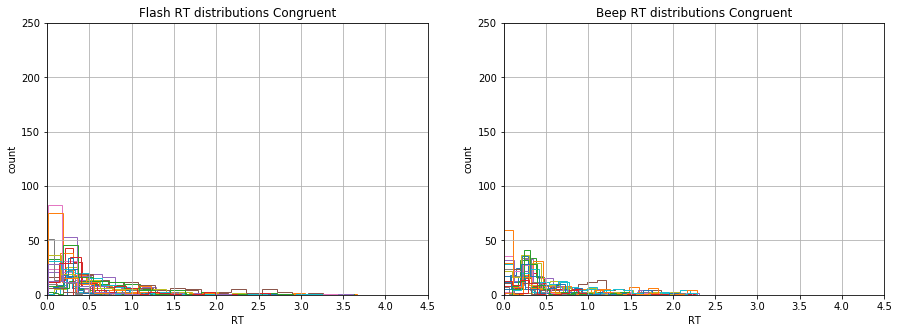

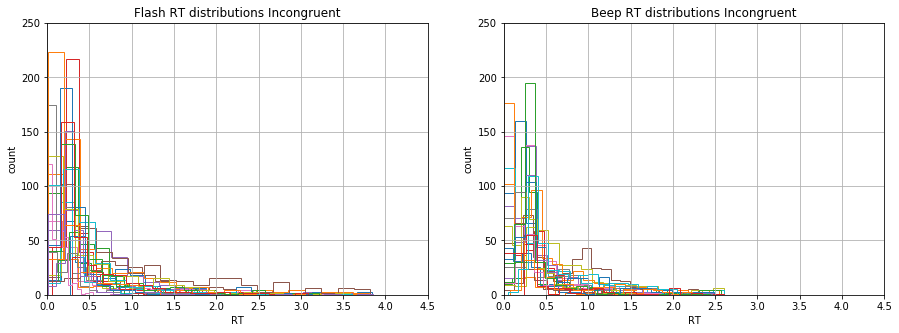

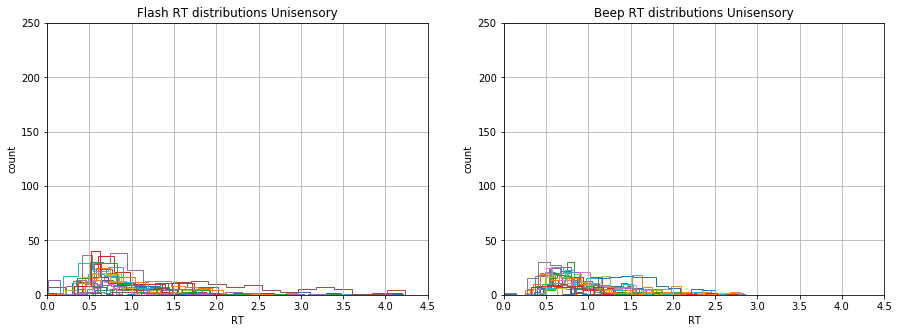

In [290]:
#test = hddm.utils.flip_errors(congfdata)

# compare congruent 
congfig = plt.figure(figsize=(15, 5))
ax = congfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in congf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# one row has -1 rt

ax = congfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in congb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# compare incongruent
incongfig = plt.figure(figsize=(15, 5))
ax = incongfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in incongf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = incongfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in incongb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# compare unisensory 
unifig = plt.figure(figsize=(15, 5))
ax = unifig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in unif.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in unib.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


1.0    1355
0.0    1007
Name: response, dtype: int64


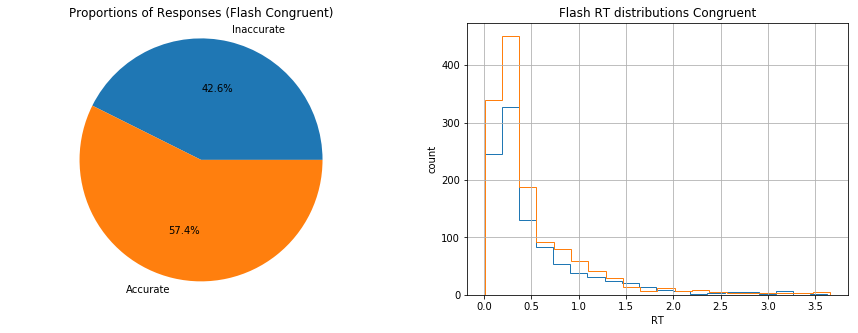

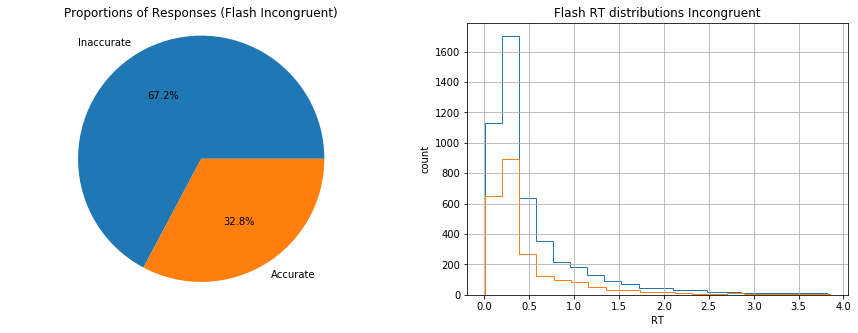

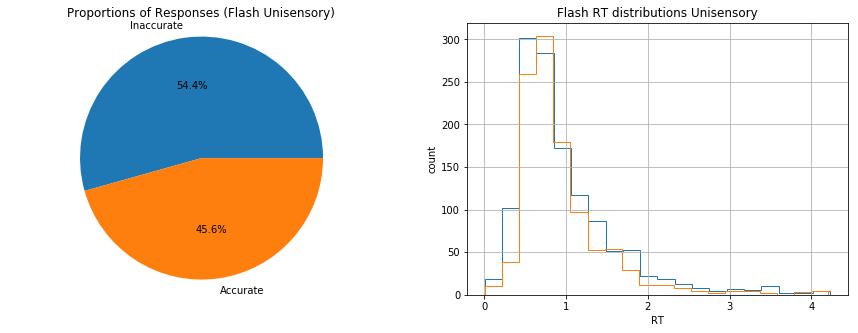

In [291]:
print(congf['response'].value_counts())
sizes = [congf['response'].value_counts()[0], congf['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, title='Proportions of Responses (Flash Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
for i, subj_data in congf.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
    
#print(incongfdata['response'].value_counts())
sizes = [incongf['response'].value_counts()[0], incongf['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig2 = plt.figure(figsize=(15, 5))
ax = fig2.add_subplot(121, title='Proportions of Responses (Flash Incongruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig2.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
for i, subj_data in incongf.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

    
#print(unifdata['response'].value_counts())
sizes = [unif['response'].value_counts()[0], unif['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig3 = plt.figure(figsize=(15, 5))
ax = fig3.add_subplot(121, title='Proportions of Responses (Flash Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig3.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
for i, subj_data in unif.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

1.0    1194
0.0    1120
Name: response, dtype: int64


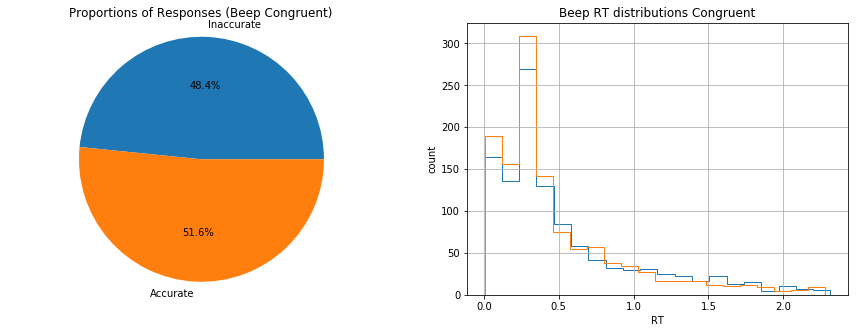

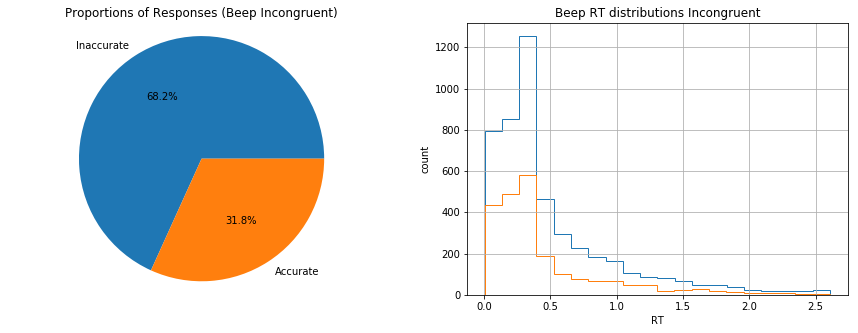

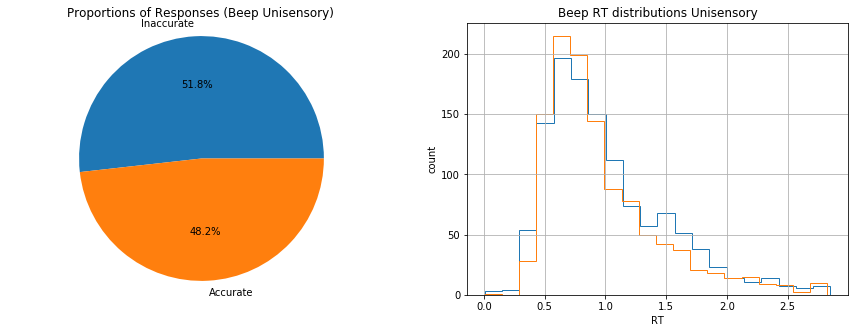

In [292]:
print(congb['response'].value_counts())
sizes = [congb['response'].value_counts()[0], congb['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig4 = plt.figure(figsize=(15, 5))
ax = fig4.add_subplot(121, title='Proportions of Responses (Beep Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig4.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
for i, subj_data in congb.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

    
#print(incongbdata['response'].value_counts())
sizes = [incongb['response'].value_counts()[0], incongb['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig5 = plt.figure(figsize=(15, 5))
ax = fig5.add_subplot(121, title='Proportions of Responses (Beep Incongruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig5.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')
for i, subj_data in incongb.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
    
#print(unibdata['response'].value_counts())
sizes = [unib['response'].value_counts()[0], unib['response'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig6 = plt.figure(figsize=(15, 5))
ax = fig6.add_subplot(121, title='Proportions of Responses (Beep Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig6.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
for i, subj_data in unib.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)